In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/open-nuro-dataset/dataset/README
/kaggle/input/open-nuro-dataset/dataset/dataset_description.json
/kaggle/input/open-nuro-dataset/dataset/participants.json
/kaggle/input/open-nuro-dataset/dataset/participants.tsv
/kaggle/input/open-nuro-dataset/dataset/CHANGES
/kaggle/input/open-nuro-dataset/dataset/sub-060/eeg/sub-060_task-eyesclosed_eeg.set
/kaggle/input/open-nuro-dataset/dataset/sub-060/eeg/sub-060_task-eyesclosed_channels.tsv
/kaggle/input/open-nuro-dataset/dataset/sub-060/eeg/sub-060_task-eyesclosed_eeg.json
/kaggle/input/open-nuro-dataset/dataset/sub-003/eeg/sub-003_task-eyesclosed_eeg.set
/kaggle/input/open-nuro-dataset/dataset/sub-003/eeg/sub-003_task-eyesclosed_channels.tsv
/kaggle/input/open-nuro-dataset/dataset/sub-003/eeg/sub-003_task-eyesclosed_eeg.json
/kaggle/input/open-nuro-dataset/dataset/sub-012/eeg/sub-012_task-eyesclosed_channels.tsv
/kaggle/input/open-nuro-dataset/dataset/sub-012/eeg/sub-012_task-eyesclosed_eeg.json
/kaggle/input/open-nuro-dataset/dat

In [3]:
subjects_info = pd.read_csv('/kaggle/input/open-nuro-dataset/dataset/participants.tsv', delimiter='\t')

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd

# First, let's identify the unique groups in the DataFrame
groups = subjects_info['Group'].unique()

# Now, let's split each group individually
train_dfs = []
test_dfs = []
for group in groups:
    # Filter the DataFrame for the current group
    group_df = subjects_info[subjects_info['Group'] == group]
    
    # Split the group data into training and testing sets while maintaining balance in gender
    train_group, test_group = train_test_split(group_df, test_size=0.3, stratify=group_df['Gender'])
    
    # Append the split data to the lists
    train_dfs.append(train_group)
    test_dfs.append(test_group)

# Concatenate the training and testing DataFrames for all groups
train_df = pd.concat(train_dfs)
test_df = pd.concat(test_dfs)

# Now, train_df and test_df contain the split data with balanced groups and secondary balance in gender


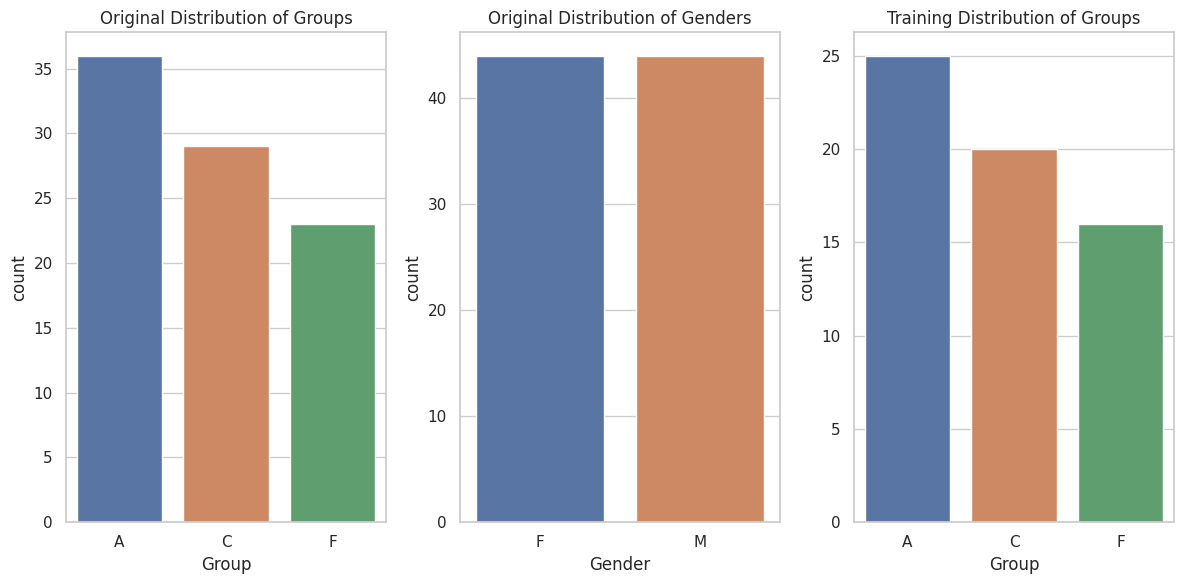

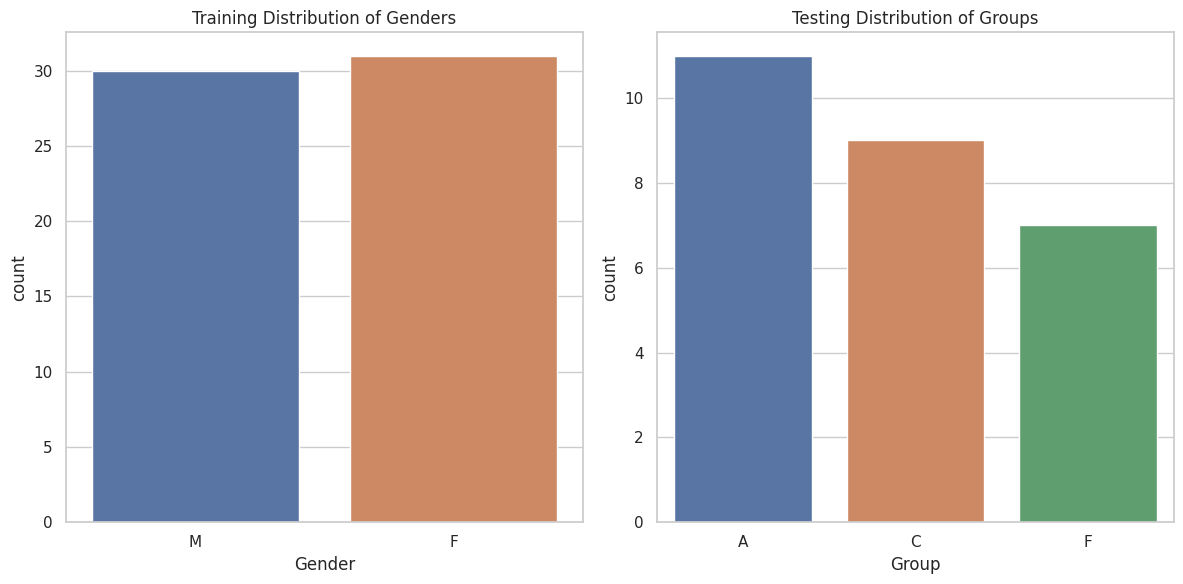

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the distribution of groups in the original DataFrame
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='Group', data=subjects_info)
plt.title('Original Distribution of Groups')

# Plot the distribution of genders in the original DataFrame
plt.subplot(1, 3, 2)
sns.countplot(x='Gender', data=subjects_info)
plt.title('Original Distribution of Genders')

# Plot the distribution of groups in the training DataFrame
plt.subplot(1, 3, 3)
sns.countplot(x='Group', data=train_df)
plt.title('Training Distribution of Groups')

plt.tight_layout()
plt.show()

# Plot the distribution of genders in the training DataFrame
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=train_df)
plt.title('Training Distribution of Genders')

# Plot the distribution of groups in the testing DataFrame
plt.subplot(1, 2, 2)
sns.countplot(x='Group', data=test_df)
plt.title('Testing Distribution of Groups')

plt.tight_layout()
plt.show()


In [6]:
# Extracting subject IDs from the training set
training_subjects = train_df['participant_id'].str.extract(r'sub-(\d+)').astype(int).squeeze().unique().tolist()

# Extracting subject IDs from the testing set
testing_subjects = test_df['participant_id'].str.extract(r'sub-(\d+)').astype(int).squeeze().unique().tolist()

# Displaying the lists of subjects
print("Training Subjects:")
print(training_subjects)

print("\nTesting Subjects:")
print(testing_subjects)


Training Subjects:
[15, 2, 35, 7, 11, 28, 6, 4, 31, 24, 13, 17, 26, 30, 10, 3, 18, 29, 23, 5, 16, 33, 34, 20, 1, 39, 44, 41, 64, 50, 55, 42, 63, 47, 37, 65, 43, 46, 51, 49, 58, 60, 59, 61, 38, 68, 79, 76, 77, 67, 69, 74, 87, 66, 83, 86, 70, 73, 78, 84, 85]

Testing Subjects:
[25, 19, 14, 12, 36, 27, 8, 22, 32, 9, 21, 45, 52, 53, 62, 56, 40, 54, 57, 48, 81, 88, 82, 72, 80, 75, 71]


In [7]:
# Initialize empty lists to store epoch data and information data
training_data = []
testing_data = []
training_info = []
testing_info = []

# Concatenate training data
for subject_num in training_subjects:
    # Load epoch data
    epoch_filename = f"/kaggle/input/epochs-of-the-alzheimer-data/epochs_data/subject_{subject_num}.npy"
    epoch_data = np.load(epoch_filename)
    training_data.append(epoch_data)
    
    # Load information data
    info_filename = f"/kaggle/input/epochs-of-the-alzheimer-data/epochs_data/epochs_information_sub_{subject_num}.csv"
    info_data = pd.read_csv(info_filename)
    training_info.append(info_data)

# Concatenate testing data
for subject_num in testing_subjects:
    # Load epoch data
    epoch_filename = f"/kaggle/input/epochs-of-the-alzheimer-data/epochs_data/subject_{subject_num}.npy"
    epoch_data = np.load(epoch_filename)
    testing_data.append(epoch_data)
    
    # Load information data
    info_filename = f"/kaggle/input/epochs-of-the-alzheimer-data/epochs_data/epochs_information_sub_{subject_num}.csv"
    info_data = pd.read_csv(info_filename)
    testing_info.append(info_data)

# Concatenate all subject data along the first axis
training_data_concatenated = np.concatenate(training_data, axis=0)
testing_data_concatenated = np.concatenate(testing_data, axis=0)

# Concatenate all subject information
training_info_concatenated = pd.concat(training_info, ignore_index=True)
testing_info_concatenated = pd.concat(testing_info, ignore_index=True)


In [8]:
training_info_concatenated.shape

(1159, 5)

In [9]:
epoch_data.shape

(20, 19, 22500)

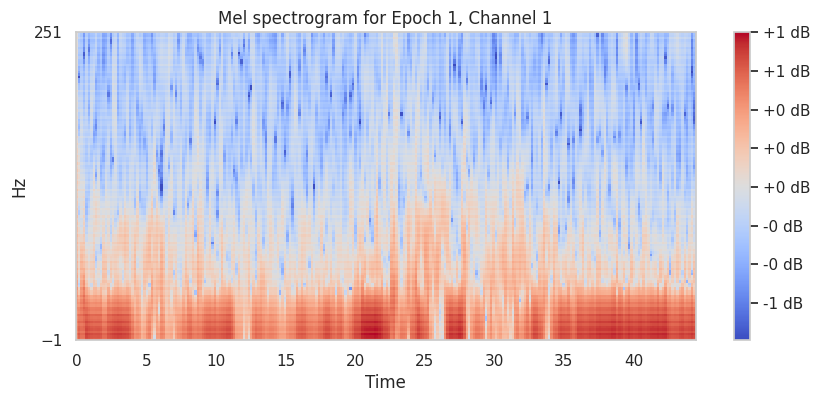

In [17]:
import numpy as np
import mne
import librosa
import matplotlib.pyplot as plt

# Load EEG data from npy file
eeg_data = np.load('/kaggle/input/epochs-of-the-alzheimer-data/epochs_data/subject_1.npy')

import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Assuming eeg_data is your EEG data with shape (15, 19, 22500)

# Define parameters
n_fft = 2048  # FFT window size
hop_length = len(eeg_data[0, 0]) // 256  # Hop length
n_mels = 128  # Number of Mel bands
fmin = 0  # Minimum frequency
fmax = 20  # Maximum frequency
win_length = 256  # Window length

# Initialize an empty array to store Mel spectrograms
mel_spectrograms = np.zeros((15, 19, n_mels, 256))  # Adjust the last dimension according to your desired output shape

# Iterate over each epoch and each channel
for epoch in range(15):
    for channel in range(19):
        # Compute the spectrogram
        spec = librosa.feature.melspectrogram(y=eeg_data[epoch, channel], sr=500, hop_length=hop_length, n_fft=n_fft, n_mels=n_mels, fmin=fmin, fmax=fmax, win_length=win_length)
        
        # Convert to dB scale
        spec_db = librosa.power_to_db(spec, ref=np.max)
        spec_db=(spec_db+40)/40
        # Store in the mel_spectrograms array
        mel_spectrograms[epoch, channel] = spec_db[:, :256]  # Adjust slicing according to your desired output shape

# Visualize one of the Mel spectrograms
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrograms[0, 1], sr=500, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram for Epoch 1, Channel 1')
plt.show()

In [18]:
mel_spectrograms.shape

(15, 19, 128, 256)

In [23]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Loop over each subject
for subject_id in range(1, 89):  # Assuming subjects are numbered from 1 to 88
    # Load EEG data from npy file
    eeg_data = np.load(f'/kaggle/input/epochs-of-the-alzheimer-data/epochs_data/subject_{subject_id}.npy')

    # Define parameters
    n_fft = 2048  # FFT window size
    hop_length = len(eeg_data[0, 0]) // 256  # Hop length
    n_mels = 128  # Number of Mel bands
    fmin = 0  # Minimum frequency
    fmax = 20  # Maximum frequency
    win_length = 256  # Window length

    # Initialize an empty array to store Mel spectrograms
    mel_spectrograms = np.zeros((eeg_data.shape[0], eeg_data.shape[1], n_mels, 256))  # Adjust the last dimension according to your desired output shape

    # Iterate over each epoch and each channel
    for epoch in range(eeg_data.shape[0]):
        for channel in range(eeg_data.shape[1]):
            # Compute the spectrogram
            spec = librosa.feature.melspectrogram(y=eeg_data[epoch, channel], sr=500, hop_length=hop_length, n_fft=n_fft, n_mels=n_mels, fmin=fmin, fmax=fmax, win_length=win_length)
            
            # Convert to dB scale
            spec_db = librosa.power_to_db(spec, ref=np.max)
            spec_db = (spec_db + 40) / 40
            
            # Store in the mel_spectrograms array
            mel_spectrograms[epoch, channel] = spec_db[:, :256]  # Adjust slicing according to your desired output shape

    # Save the Mel spectrograms for the current subject
    np.save(f'subject_{subject_id}_mel_spectrograms.npy', mel_spectrograms)

    # Optionally, visualize and save plots
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spectrograms[0, 1], sr=500, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel spectrogram for Epoch 1, Channel 1 (Subject {subject_id})')
    plt.savefig(f'subject_{subject_id}_mel_spectrogram.png')
    plt.close()


In [20]:
eeg_data.shape

(9, 19, 22500)